<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [63]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [64]:
##### Your Code Here #####

df = pd.read_csv('./data/job_listings.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()                

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [65]:
##### Your Code Here #####
from bs4 import BeautifulSoup

df['description'] = [BeautifulSoup(text).get_text().replace("\\n", " " ).strip("b '").lower() for text in df['description'] ]

In [66]:
df.head()

,description,title
0,"""job requirements: conceptual understanding in...",Data scientist
1,"job description as a data scientist 1, you wi...",Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,"$4,969 - $6,756 a monthcontractunder the gener...",Data Scientist
4,location: usa \xe2\x80\x93 multiple locations ...,Data Scientist


In [67]:
df['description'][1]

'job description  as a data scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. you will do so by empowering and improving the next generation of accolade applications and user experiences. a day in the life\\xe2\\x80\\xa6 work with a small agile team to design and develop mobile applications in an iterative fashion. work with a tight-knit group of development team members in seattle. contribute to best practices and help guide the future of our applications. operates effectively as a collaborative member of the development team. operates effectively as an individual for quick turnaround of enhancements and fixes. responsible for meeting expectations and deliverables on time with high quality. drive and implement new features within our mobile applications. perform thorough manual testing and writing test cases that cover all areas. identify new development tools/approaches that will incr

In [68]:
nlp = spacy.load("en_core_web_lg")

In [69]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
 
    for token in doc:
        if((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!='PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [126]:
df['tokens'] = df['description'].apply(get_lemmas)

In [127]:
df['tokens'].head()

0    [job, requirement, conceptual, understanding, ...
1    [job, description,  , data, scientist, 1, help...
2    [data, scientist, work, consult, business, res...
3    [$, 4,969, $, 6,756, monthcontractunder, gener...
4    [location, usa, \xe2\x80\x93, multiple, locati...
Name: tokens, dtype: object

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 3 columns):
description    426 non-null object
title          426 non-null object
tokens         426 non-null object
dtypes: object(3)
memory usage: 10.1+ KB


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [129]:
df['tokens'] = df['tokens'].apply(' '.join)

df['tokens'].head()

0    job requirement conceptual understanding machi...
1    job description   data scientist 1 help build ...
2    data scientist work consult business responsib...
3    $ 4,969 $ 6,756 monthcontractunder general sup...
4    location usa \xe2\x80\x93 multiple location 2 ...
Name: tokens, dtype: object

In [130]:
##### Your Code Here #####
# create the transformer
vect = CountVectorizer()

# tokenize and build vocab
vect.fit(df['tokens'])

# transform text
dtm = vect.transform(df['tokens'])

In [ ]:
print(vect.get_feature_names())

In [131]:
dtm

<426x6893 sparse matrix of type '<class 'numpy.int64'>'
	with 89282 stored elements in Compressed Sparse Row format>

In [132]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]])

## 4) Visualize the most common word counts

In [133]:
##### Your Code Here #####
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
word_ranks = dtm.sum().sort_values(ascending=False)

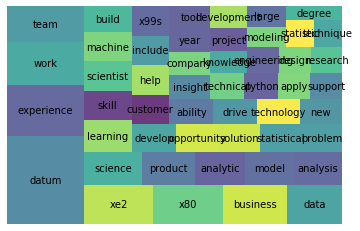

In [136]:
import squarify

squarify.plot(sizes=word_ranks.values[:50], label=word_ranks.index[:50], alpha=0.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [138]:
##### Your Code Here #####
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(df["description"])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.106253,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [139]:
# Instantiate
from sklearn.neighbors import NearestNeighbors


# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [140]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(dtm)

nn.kneighbors(new.todense())

(array([[1.36774692, 1.3790537 , 1.41421356, 1.41421356, 1.41421356],
        [1.21904123, 1.32937074, 1.33144437, 1.33144437, 1.33793118],
        [1.38591897, 1.41421356, 1.41421356, 1.41421356, 1.41421356],
        ...,
        [1.35430611, 1.41421356, 1.41421356, 1.41421356, 1.41421356],
        [1.32097892, 1.41421356, 1.41421356, 1.41421356, 1.41421356],
        [1.07227409, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]),
 array([[332, 116, 124, 256, 388],
        [ 19, 116, 423,  44,  20],
        [288, 124, 256, 388,  29],
        ...,
        [140, 124, 411,  81, 167],
        [371, 124, 411, 167,  81],
        [258, 124, 411, 167,  81]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 